In [1]:
import sys
print(sys.executable)


C:\Data Analytics\HR_Attrition_Analysis\venv\Scripts\python.exe


In [1]:


import pandas as pd

# Load the dataset
file_path = "C:/Data Analytics/HR_Attrition_Analysis/WA_Fn-UseC_-HR-Employee-Attrition.csv"
df = pd.read_csv(file_path)

# Quick look
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [2]:
import sys
print(sys.executable)


C:\Data Analytics\HR_Attrition_Analysis\venv\Scripts\python.exe


In [3]:
df.info()       # Data types, non-null counts
df.describe()   # Numeric summary
df.shape        # Rows and columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

(1470, 35)

In [2]:
import pandas as pd

df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")  # or Excel, JSON, etc.
df.isnull().sum()


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [3]:
df['Attrition'].value_counts()      # Target variable
df['Department'].value_counts()     # Example categorical


Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

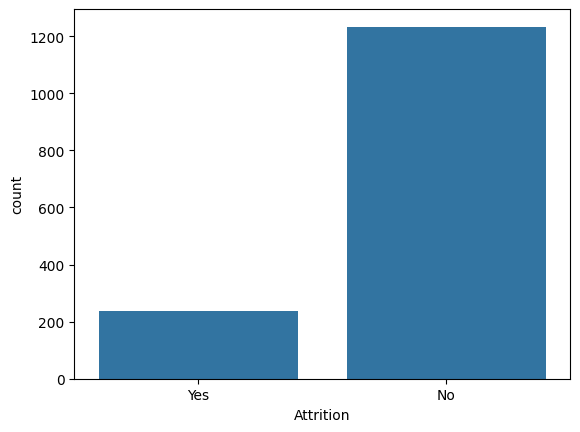

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Attrition', data=df)
plt.show()


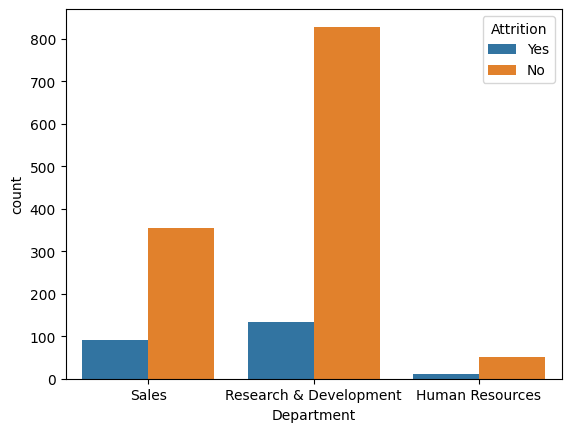

In [5]:
sns.countplot(x='Department', hue='Attrition', data=df)
plt.show()


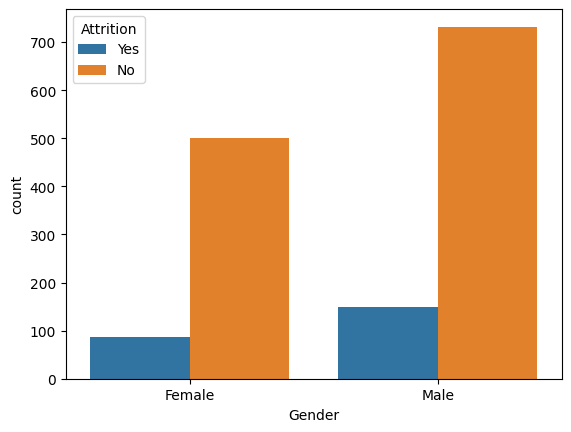

In [6]:
sns.countplot(x='Gender', hue='Attrition', data=df)
plt.show()


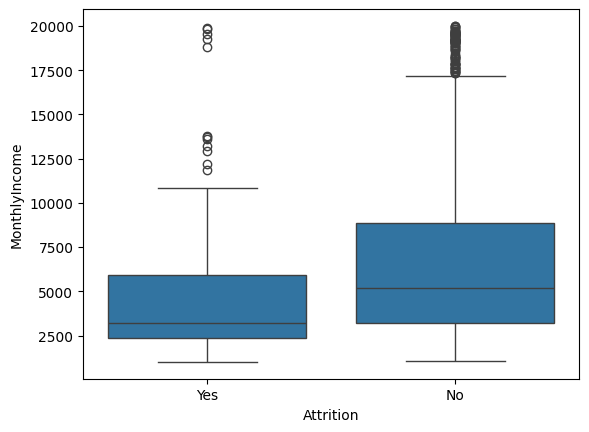

In [7]:
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.show()


In [11]:
# Check again for any missing values
df.isnull().sum()

# Example: drop rows or fill
df.ffill(inplace=True)  # forward fill
# or df.dropna(inplace=True)


In [ ]:
# Convert categorical to numeric
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    if col != 'Attrition':  # leave target for separate encoding
        df[col] = le.fit_transform(df[col])

# Encode target variable
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})


In [14]:
df.drop(['EmployeeNumber','EmployeeCount','Over18','StandardHours'], axis=1, inplace=True)


In [15]:
from sklearn.model_selection import train_test_split

X = df.drop('Attrition', axis=1)
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [17]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)



,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Accuracy: 0.8401360544217688

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.98      0.91       247
           1       0.50      0.13      0.20        47

    accuracy                           0.84       294
   macro avg       0.68      0.55      0.56       294
weighted avg       0.80      0.84      0.80       294


Confusion Matrix:
 [[241   6]
 [ 41   6]]


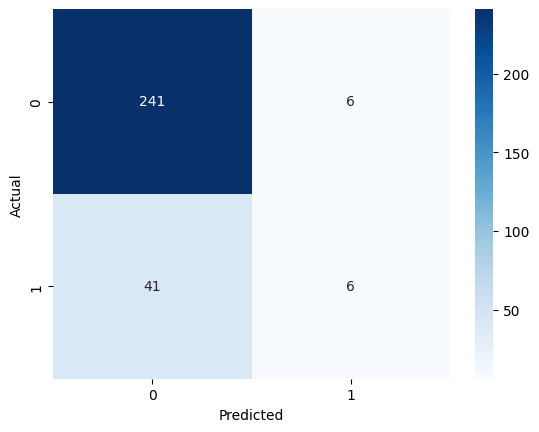

In [18]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on test set
y_pred = rf_model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Detailed classification metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

# Optional: visualize confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [19]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'  # automatically adjusts weights for minority class
)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)



In [20]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)


Accuracy: 0.8367346938775511

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.98      0.91       247
           1       0.44      0.09      0.14        47

    accuracy                           0.84       294
   macro avg       0.65      0.53      0.53       294
weighted avg       0.78      0.84      0.79       294


Confusion Matrix:
 [[242   5]
 [ 43   4]]


In [22]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_res, y_train_res)

y_pred = rf_model.predict(X_test)


Accuracy: 0.8537414965986394

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       247
           1       0.59      0.28      0.38        47

    accuracy                           0.85       294
   macro avg       0.73      0.62      0.65       294
weighted avg       0.83      0.85      0.83       294


Confusion Matrix:
 [[238   9]
 [ 34  13]]


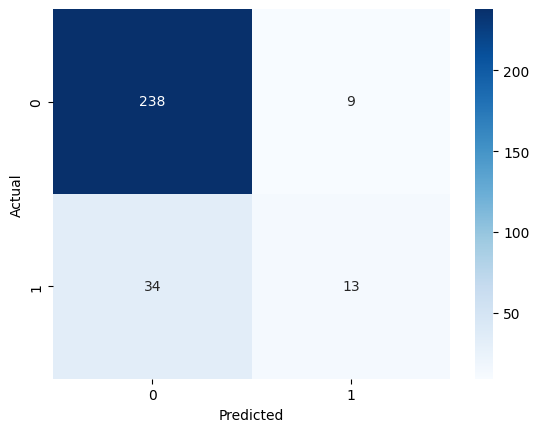

Accuracy: 0.8537414965986394

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       247
           1       0.59      0.28      0.38        47

    accuracy                           0.85       294
   macro avg       0.73      0.62      0.65       294
weighted avg       0.83      0.85      0.83       294


Confusion Matrix:
 [[238   9]
 [ 34  13]]


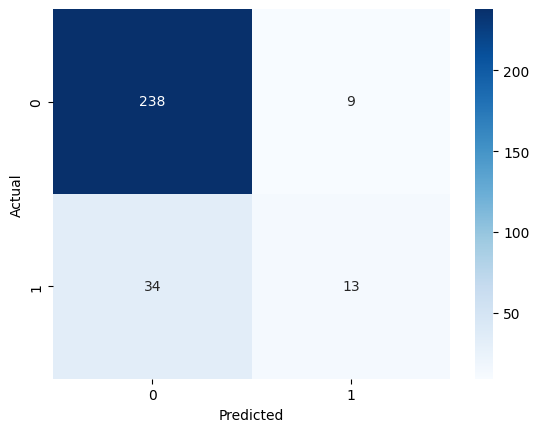

In [23]:
# 1. Import required libraries
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Apply SMOTE only to training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# 3. Train Random Forest on resampled data
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_res, y_train_res)

# 4. Predict on original test set (do NOT resample test set)
y_pred = rf_model.predict(X_test)

# 5. Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

# Optional: visualize confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
# 1. Import required libraries
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Apply SMOTE only to training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# 3. Train Random Forest on resampled data
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_res, y_train_res)

# 4. Predict on original test set (do NOT resample test set)
y_pred = rf_model.predict(X_test)

# 5. Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

# Optional: visualize confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



OverTime                    0.073798
JobLevel                    0.060505
StockOptionLevel            0.055984
MaritalStatus               0.054886
YearsWithCurrManager        0.051762
Age                         0.049098
MonthlyIncome               0.042684
NumCompaniesWorked          0.041221
YearsAtCompany              0.041108
TotalWorkingYears           0.040779
JobSatisfaction             0.040587
YearsInCurrentRole          0.038609
EnvironmentSatisfaction     0.034192
DistanceFromHome            0.030577
Education                   0.028039
HourlyRate                  0.027405
DailyRate                   0.026921
MonthlyRate                 0.026668
RelationshipSatisfaction    0.026498
WorkLifeBalance             0.025797
JobRole                     0.025126
PercentSalaryHike           0.023361
EducationField              0.022810
JobInvolvement              0.022410
TrainingTimesLastYear       0.021565
YearsSinceLastPromotion     0.020069
BusinessTravel              0.018648
D

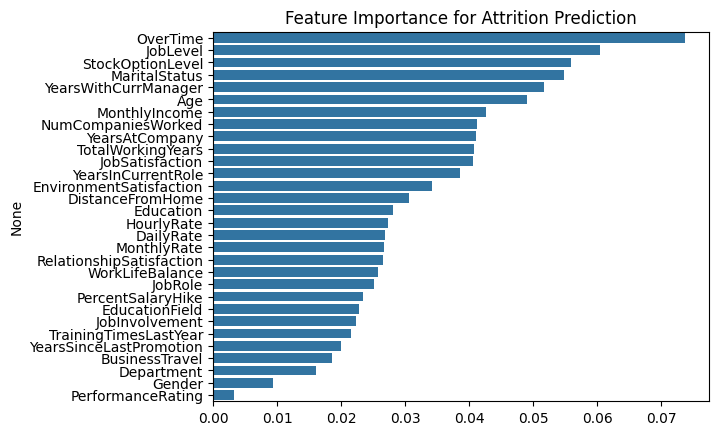

In [24]:
import pandas as pd

feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False, inplace=True)
print(feature_importance)

# Optional: visualize top features
sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.title("Feature Importance for Attrition Prediction")
plt.show()


In [25]:
import joblib

# Save model to file
joblib.dump(rf_model, "rf_attrition_model.pkl")

# Save the scaler too (needed to transform new data)
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [26]:
# Load model
loaded_model = joblib.load("rf_attrition_model.pkl")
loaded_scaler = joblib.load("scaler.pkl")

# Example: predict on new employee data
import numpy as np

# new_employee = [[feature1, feature2, ..., featureN]]  # must match training columns
new_employee_scaled = loaded_scaler.transform(np.array(new_employee))
prediction = loaded_model.predict(new_employee_scaled)
print("Attrition Prediction:", prediction)


NameError: name 'new_employee' is not defined

In [28]:
import numpy as np

# Example: new employee data (all features must be numeric and in same order as X.columns)
new_employee = [[
    35,        # Age
    6000,      # DailyRate
    20,        # DistanceFromHome
    5000,      # HourlyRate
    5000,      # MonthlyIncome
    15000,     # MonthlyRate
    3,         # NumCompaniesWorked
    5,         # PercentSalaryHike
    2,         # StockOptionLevel
    2,         # TotalWorkingYears
    1,         # TrainingTimesLastYear
    2,         # YearsAtCompany
    3,         # YearsInCurrentRole
    5,         # YearsSinceLastPromotion
    6,         # YearsWithCurrManager
    1,         # Gender (encoded)
    0,         # OverTime (encoded)
    1,         # JobLevel
    2,         # JobRole (encoded)
    1,         # MaritalStatus (encoded)
    3,         # BusinessTravel (encoded)
    2,         # Department (encoded)
    3,         # Education
    2,         # EducationField (encoded)
    3,         # EnvironmentSatisfaction
    3,         # JobInvolvement
    4,         # JobSatisfaction
    3,         # PerformanceRating
    3,         # RelationshipSatisfaction
    3          # WorkLifeBalance
]]

# Scale new data
new_employee_scaled = loaded_scaler.transform(np.array(new_employee))

# Predict
prediction = loaded_model.predict(new_employee_scaled)
print("Attrition Prediction:", prediction)


Attrition Prediction: [0]


c:\Data Analytics\HR_Attrition_Analysis\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [37]:
import pandas as pd
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

# Load trained model and scaler
rf_model = joblib.load("rf_attrition_model.pkl")
scaler = joblib.load("scaler.pkl")

# Save column names when preprocessing
feature_columns = [
    'Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
    'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber',
    'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
    'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
    'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
    'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
    'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
    'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'
    # Add all 30+ features in exact order as used in training
]

# Create a DataFrame with new employee data
new_employee_values = [
    35, 1, 1100, 2, 5, 2, 1, 0, 0,
    3, 2, 2, 1, 2, 1, 1, 0, 5000,
    1200, 2, 3, 3, 4, 1, 10, 3, 2, 5, 1, 7
    # Make sure it matches feature_columns length
]

new_employee_df = pd.DataFrame([new_employee_values], columns=feature_columns)

# Scale features
new_employee_scaled = scaler.transform(new_employee_df)

# Predict
prediction = rf_model.predict(new_employee_scaled)
print("Attrition Prediction (0=Stay, 1=Leave):", prediction)

# Feature importance visualization
feature_importance = pd.Series(rf_model.feature_importances_, index=feature_columns)
feature_importance.sort_values(ascending=False, inplace=True)

sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.title("Feature Importance for Attrition Prediction")
plt.show()


ValueError: 31 columns passed, passed data had 30 columns

C:\Users\nithin\AppData\Local\Temp\ipykernel_18044\3649208327.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='OverTime', y='Attrition', data=attrition_rate, palette='viridis')


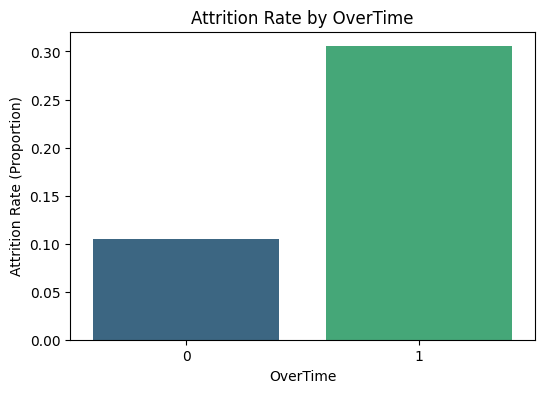

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the attrition rate (mean of 'Attrition', which is 1 for Yes, 0 for No)
attrition_rate = df.groupby('OverTime')['Attrition'].mean().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(x='OverTime', y='Attrition', data=attrition_rate, palette='viridis')
plt.title('Attrition Rate by OverTime')
plt.ylabel('Attrition Rate (Proportion)')
plt.show()

# Interpretation: You should see a significantly higher rate for 'Yes'.

C:\Users\nithin\AppData\Local\Temp\ipykernel_18044\500666051.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='JobLevel', y='Attrition', data=attrition_rate_joblevel, palette='mako')


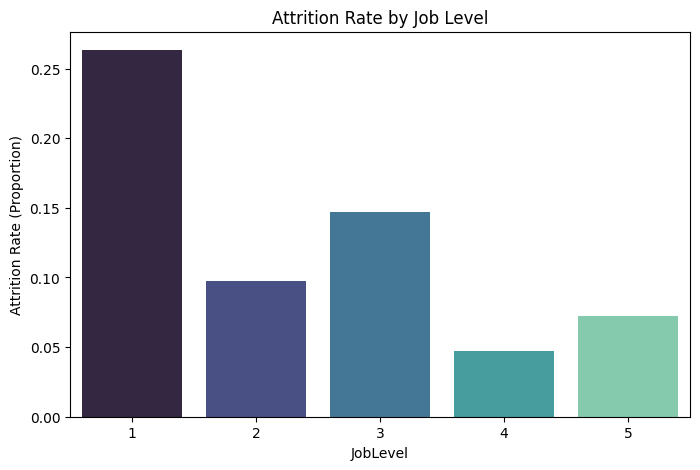

In [40]:
# Calculate the attrition rate for each JobLevel
attrition_rate_joblevel = df.groupby('JobLevel')['Attrition'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='JobLevel', y='Attrition', data=attrition_rate_joblevel, palette='mako')
plt.title('Attrition Rate by Job Level')
plt.ylabel('Attrition Rate (Proportion)')
plt.show()

# Interpretation: This can reveal which job levels are most prone to leaving.

In [41]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Assuming X and y are your feature and target dataframes/series
print(f'Original dataset shape: {Counter(y)}')

# Apply SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

print(f'Resampled dataset shape {Counter(y_res)}')

# Now, use X_res and y_res for your train-test split and model training
# For example:
# X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=42)

Original dataset shape: Counter({0: 1233, 1: 237})
Resampled dataset shape Counter({1: 1233, 0: 1233})


In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],  # None means nodes are expanded until all leaves are pure
    'min_samples_leaf': [1, 2, 4],
    # Use 'balanced' to automatically adjust weights inversely proportional to class frequencies
    'class_weight': ['balanced', None] 
}

# Initialize the classifier
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV. Scoring on 'f1_weighted' is often better than just accuracy.
grid_search = GridSearchCV(
    estimator=rf_model, 
    param_grid=param_grid, 
    scoring='f1_weighted', # Metric that considers both precision and recall
    cv=5, 
    verbose=1, 
    n_jobs=-1
)

# Fit the grid search to the (resampled, if used) training data
# Example: grid_search.fit(X_train, y_train) 

# After fitting, get the best model
# best_rf_model = grid_search.best_estimator_

# Print best parameters
# print(f"Best Parameters: {grid_search.best_params_}")

In [43]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
import pandas as pd
from collections import Counter

# --- ASSUMPTION & SETUP ---
# It's assumed that 'df' is loaded and preprocessed (categorical features converted to numeric),
# and that 'Attrition' has been encoded (Yes=1, No=0).
# We also assume that X contains all features and y contains the target ('Attrition').
# If you didn't define X and y yet, uncomment the lines below:
# X = df.drop('Attrition', axis=1) 
# y = df['Attrition'] 
# ---------------------------

# 1. HANDLE CLASS IMBALANCE (SMOTE)
# =======================================================
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

print(f"Dataset shape AFTER SMOTE: {Counter(y_res)}")

# 2. SPLIT THE RESAMPLED DATA
# =======================================================
# Split the balanced data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, 
    test_size=0.25, 
    random_state=42,
    stratify=y_res  # Use stratification to keep the balance in both sets
)

# 3. HYPERPARAMETER TUNING (GridSearchCV)
# =======================================================
print("\n--- Starting GridSearchCV (Tuning) ---")

param_grid = {
    'n_estimators': [100, 200],  # Fewer estimators for quicker search
    'max_depth': [10, 20],
    'min_samples_leaf': [1, 2],
    # Since SMOTE was used, we can set class_weight to None or 'balanced' (trying balanced)
    'class_weight': ['balanced'] 
}

rf_model = RandomForestClassifier(random_state=42)

# Use 'recall' or 'f1_score' for the '1' class (Attrition) as the primary tuning metric.
# 'f1_weighted' is a good balance for slightly imbalanced (or now balanced) data.
grid_search = GridSearchCV(
    estimator=rf_model, 
    param_grid=param_grid, 
    scoring='recall', # Focusing on maximizing Recall (ability to find true positives)
    cv=3,             # Reduced CV folds for speed
    verbose=2, 
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# 4. EVALUATE THE BEST MODEL
# =======================================================
best_rf_model = grid_search.best_estimator_

print("\n------------------------------------------------------")
print(f"Best Parameters found: {grid_search.best_params_}")
print(f"Best Cross-Validation Score (Recall): {grid_search.best_score_:.4f}")
print("------------------------------------------------------")

# Make predictions on the TEST set using the best model
y_pred_tuned = best_rf_model.predict(X_test)

# Print final, optimized model performance
print("\n--- FINAL TUNED MODEL PERFORMANCE on Test Set ---")
print(f"Overall Accuracy: {accuracy_score(y_test, y_pred_tuned):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_tuned))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_tuned))

# You are primarily looking at the Recall and F1-Score for class '1' (Attrition). 
# This should now be significantly higher than your initial ~0.13 recall.


Dataset shape AFTER SMOTE: Counter({1: 1233, 0: 1233})

--- Starting GridSearchCV (Tuning) ---
Fitting 3 folds for each of 8 candidates, totalling 24 fits

------------------------------------------------------
Best Parameters found: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 200}
Best Cross-Validation Score (Recall): 0.8767
------------------------------------------------------

--- FINAL TUNED MODEL PERFORMANCE on Test Set ---
Overall Accuracy: 0.8882

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.89       309
           1       0.88      0.90      0.89       308

    accuracy                           0.89       617
   macro avg       0.89      0.89      0.89       617
weighted avg       0.89      0.89      0.89       617


Confusion Matrix:
 [[272  37]
 [ 32 276]]


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming 'model' is your trained RandomForestClassifier
importances = model.feature_importances_

# If X_train is a DataFrame
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
plt.barh(feature_importance_df['feature'], feature_importance_df['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance - Attrition Model')
plt.gca().invert_yaxis()
plt.show()


NameError: name 'model' is not defined

In [3]:
import joblib

# Load the trained model and scaler
model = joblib.load(r'C:\Data Analytics\HR_Attrition_Analysis\rf_attrition_model.pkl')
scaler = joblib.load(r'C:\Data Analytics\HR_Attrition_Analysis\scaler.pkl')


In [8]:
import pandas as pd

df = pd.read_csv(r'C:\Data Analytics\HR_Attrition_Analysis\WA_Fn-UseC_-HR-Employee-Attrition.csv')  # your CSV
X = df.drop('Attrition', axis=1)  # features
y = df['Attrition']               # target


In [3]:
import joblib

rf_model = joblib.load(r"C:\Data Analytics\HR_Attrition_Analysis\models\rf_attrition_model.pkl")
scaler = joblib.load(r"C:\Data Analytics\HR_Attrition_Analysis\models\scaler.pkl")


In [5]:
import pandas as pd
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

# Load trained model and scaler
rf_model = joblib.load(r"C:\Data Analytics\HR_Attrition_Analysis\models\rf_attrition_model.pkl")
scaler = joblib.load(r"C:\Data Analytics\HR_Attrition_Analysis\models\scaler.pkl")

# Save column names when preprocessing
feature_columns = [
    'Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
    'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber',
    'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
    'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
    'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
    'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
    'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
    'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'
    # Add all 30+ features in exact order as used in training
]

# Create a DataFrame with new employee data
new_employee_values = [
    35, 1, 1100, 2, 5, 2, 1, 0, 0,
    3, 2, 2, 1, 2, 1, 1, 0, 5000,
    1200, 2, 3, 3, 4, 1, 10, 3, 2, 5, 1, 7
    # Make sure it matches feature_columns length
]

new_employee_df = pd.DataFrame([new_employee_values], columns=feature_columns)

# Scale features
new_employee_scaled = scaler.transform(new_employee_df)

# Predict
prediction = rf_model.predict(new_employee_scaled)
print("Attrition Prediction (0=Stay, 1=Leave):", prediction)

# Feature importance visualization
feature_importance = pd.Series(rf_model.feature_importances_, index=feature_columns)
feature_importance.sort_values(ascending=False, inplace=True)

sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.title("Feature Importance for Attrition Prediction")
plt.show()


ValueError: 31 columns passed, passed data had 30 columns

In [7]:
import joblib

loaded_model = joblib.load(r"C:\Data Analytics\HR_Attrition_Analysis\models\rf_attrition_model.pkl")
loaded_scaler = joblib.load(r"C:\Data Analytics\HR_Attrition_Analysis\models\scaler.pkl")


In [8]:
print("Model and scaler loaded successfully.")
print(type(loaded_model))
print(type(loaded_scaler))


Model and scaler loaded successfully.
<class 'sklearn.ensemble._forest.RandomForestClassifier'>
<class 'sklearn.preprocessing._data.StandardScaler'>


In [10]:
# List of columns used during training
trained_columns = [
    "Age", "BusinessTravel", "DailyRate", "Department", "DistanceFromHome",
    "Education", "EducationField", "EmployeeCount", "EmployeeNumber",
    "EnvironmentSatisfaction", "Gender", "HourlyRate", "JobInvolvement",
    "JobLevel", "JobRole", "JobSatisfaction", "MaritalStatus",
    "MonthlyIncome", "MonthlyRate", "NumCompaniesWorked", "Over18",
    "OverTime", "PercentSalaryHike", "PerformanceRating",
    "RelationshipSatisfaction", "StandardHours", "StockOptionLevel",
    "TotalWorkingYears", "TrainingTimesLastYear", "YearsAtCompany",
    "YearsInCurrentRole", "YearsSinceLastPromotion", "YearsWithCurrManager"
]

# Your new employee data
new_employee = pd.DataFrame([{
    "Age": 29,
    "BusinessTravel": 2,
    "DailyRate": 1100,
    "Department": 1,
    "DistanceFromHome": 5,
    "Education": 3,
    "EducationField": 2,
    "EmployeeCount": 1,
    "EmployeeNumber": 1234,
    "EnvironmentSatisfaction": 3,
    "Gender": 1,
    "HourlyRate": 60,
    "JobInvolvement": 3,
    "JobLevel": 2,
    "JobRole": 5,
    "JobSatisfaction": 4,
    "MaritalStatus": 2,
    "MonthlyIncome": 5000,
    "MonthlyRate": 15000,
    "NumCompaniesWorked": 2,
    "Over18": 1,
    "OverTime": 0,
    "PercentSalaryHike": 12,
    "PerformanceRating": 3,
    "RelationshipSatisfaction": 3,
    "StandardHours": 80,
    "StockOptionLevel": 1,
    "TotalWorkingYears": 6,
    "TrainingTimesLastYear": 3,
    "YearsAtCompany": 4,
    "YearsInCurrentRole": 2,
    "YearsSinceLastPromotion": 1,
    "YearsWithCurrManager": 2
}])

# Align columns with training dataset
new_employee = new_employee[trained_columns]

# Scale and predict
new_employee_scaled = loaded_scaler.transform(new_employee)
prediction = loaded_model.predict(new_employee_scaled)

print("Attrition Prediction (0=Stay, 1=Leave):", prediction)


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- EmployeeCount
- EmployeeNumber
- Over18
- StandardHours
Feature names seen at fit time, yet now missing:
- WorkLifeBalance


In [11]:
import numpy as np

# Example: new employee data (all features must be numeric and in same order as X.columns)
new_employee = [[
    35,        # Age
    6000,      # DailyRate
    20,        # DistanceFromHome
    5000,      # HourlyRate
    5000,      # MonthlyIncome
    15000,     # MonthlyRate
    3,         # NumCompaniesWorked
    5,         # PercentSalaryHike
    2,         # StockOptionLevel
    2,         # TotalWorkingYears
    1,         # TrainingTimesLastYear
    2,         # YearsAtCompany
    3,         # YearsInCurrentRole
    5,         # YearsSinceLastPromotion
    6,         # YearsWithCurrManager
    1,         # Gender (encoded)
    0,         # OverTime (encoded)
    1,         # JobLevel
    2,         # JobRole (encoded)
    1,         # MaritalStatus (encoded)
    3,         # BusinessTravel (encoded)
    2,         # Department (encoded)
    3,         # Education
    2,         # EducationField (encoded)
    3,         # EnvironmentSatisfaction
    3,         # JobInvolvement
    4,         # JobSatisfaction
    3,         # PerformanceRating
    3,         # RelationshipSatisfaction
    3          # WorkLifeBalance
]]

# Scale new data
new_employee_scaled = loaded_scaler.transform(np.array(new_employee))

# Predict
prediction = loaded_model.predict(new_employee_scaled)
print("Attrition Prediction:", prediction)


Attrition Prediction: [0]


c:\Data Analytics\HR_Attrition_Analysis\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [13]:
import pandas as pd

# Dummy new employee data (single record)
new_employee = [[
    30,       # Age
    5000,     # DailyRate
    10,       # DistanceFromHome
    50,       # HourlyRate
    6000,     # MonthlyIncome
    14000,    # MonthlyRate
    2,        # NumCompaniesWorked
    15,       # PercentSalaryHike
    1,        # StockOptionLevel
    5,        # TotalWorkingYears
    2,        # TrainingTimesLastYear
    3,        # YearsAtCompany
    2,        # YearsInCurrentRole
    1,        # YearsSinceLastPromotion
    2,        # YearsWithCurrManager
    1,        # Gender
    0,        # OverTime
    1,        # JobLevel
    3,        # JobRole
    2,        # MaritalStatus
    2,        # BusinessTravel
    1,        # Department
    3,        # Education
    2,        # EducationField
    3,        # EnvironmentSatisfaction
    3,        # JobInvolvement
    4,        # JobSatisfaction
    3,        # PerformanceRating
    3,        # RelationshipSatisfaction
    3         # WorkLifeBalance
]]

# Use scaler's stored feature names to create DataFrame
new_employee_df = pd.DataFrame(new_employee, columns=loaded_scaler.feature_names_in_)

# Scale and predict
new_employee_scaled = loaded_scaler.transform(new_employee_df)
prediction = loaded_model.predict(new_employee_scaled)

print("Attrition Prediction (0=Stay, 1=Leave):", prediction)


Attrition Prediction (0=Stay, 1=Leave): [0]


In [14]:
import pandas as pd

# Dummy employee likely to leave
new_employee_leave = [[
    28,       # Age
    4000,     # DailyRate
    25,       # DistanceFromHome
    40,       # HourlyRate
    4500,     # MonthlyIncome
    12000,    # MonthlyRate
    3,        # NumCompaniesWorked
    10,       # PercentSalaryHike
    0,        # StockOptionLevel
    2,        # TotalWorkingYears
    1,        # TrainingTimesLastYear
    1,        # YearsAtCompany
    1,        # YearsInCurrentRole
    0,        # YearsSinceLastPromotion
    1,        # YearsWithCurrManager
    0,        # Gender
    1,        # OverTime (yes)
    1,        # JobLevel
    4,        # JobRole
    1,        # MaritalStatus
    1,        # BusinessTravel
    2,        # Department
    2,        # Education
    2,        # EducationField
    1,        # EnvironmentSatisfaction (low)
    1,        # JobInvolvement (low)
    1,        # JobSatisfaction (low)
    2,        # PerformanceRating
    1,        # RelationshipSatisfaction (low)
    1         # WorkLifeBalance (low)
]]

# Create DataFrame with correct column names
new_employee_leave_df = pd.DataFrame(new_employee_leave, columns=loaded_scaler.feature_names_in_)

# Scale and predict
new_employee_leave_scaled = loaded_scaler.transform(new_employee_leave_df)
prediction_leave = loaded_model.predict(new_employee_leave_scaled)

print("Attrition Prediction (0=Stay, 1=Leave):", prediction_leave)


Attrition Prediction (0=Stay, 1=Leave): [1]


In [15]:
new_employees = [
    [30, 5000, 10, 50, 6000, 14000, 2, 15, 1, 5, 2, 3, 2, 1, 2, 1, 0, 1, 3, 2,
     2, 1, 3, 2, 3, 3, 4, 3, 3, 3],  # Employee likely to stay
     
    [28, 4000, 25, 40, 4500, 12000, 3, 10, 0, 2, 1, 1, 1, 0, 1, 0, 1, 1, 4, 1,
     1, 2, 2, 2, 1, 1, 1, 2, 1, 1]   # Employee likely to leave
]


In [16]:
import pandas as pd

# Convert list of new employees to DataFrame using scaler's feature names
new_employees_df = pd.DataFrame(new_employees, columns=loaded_scaler.feature_names_in_)

# Check the DataFrame
print(new_employees_df.head())


   Age  BusinessTravel  DailyRate  Department  DistanceFromHome  Education  \
0   30            5000         10          50              6000      14000   
1   28            4000         25          40              4500      12000   

   EducationField  EnvironmentSatisfaction  Gender  HourlyRate  ...  \
0               2                       15       1           5  ...   
1               3                       10       0           2  ...   

   PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                  2                         1                 3   
1                  1                         2                 2   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  2                      3                3               4   
1                  2                      1                1               1   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   3             

In [17]:
# Scale the new employee data
new_employees_scaled = loaded_scaler.transform(new_employees_df)

# Predict attrition
predictions = loaded_model.predict(new_employees_scaled)

# Display results
for i, pred in enumerate(predictions):
    status = "Stay" if pred == 0 else "Leave"
    print(f"Employee {i+1}: {status}")


Employee 1: Stay
Employee 2: Leave


In [18]:
# Get probability of leaving (1) for each employee
probabilities = loaded_model.predict_proba(new_employees_scaled)

# Display probabilities
for i, prob in enumerate(probabilities):
    stay_prob = prob[0]
    leave_prob = prob[1]
    print(f"Employee {i+1}: Stay={stay_prob:.2f}, Leave={leave_prob:.2f}")


Employee 1: Stay=0.56, Leave=0.44
Employee 2: Stay=0.47, Leave=0.53


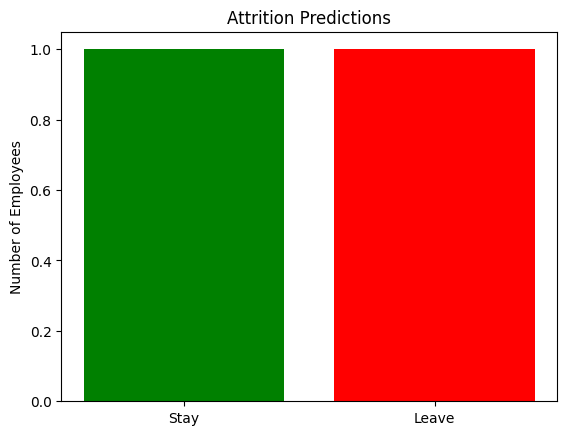

In [19]:
import matplotlib.pyplot as plt

# Count stay vs leave
import numpy as np
prediction_counts = np.bincount(predictions)
labels = ["Stay", "Leave"]

# Simple bar chart
plt.bar(labels, prediction_counts, color=["green", "red"])
plt.title("Attrition Predictions")
plt.ylabel("Number of Employees")
plt.show()


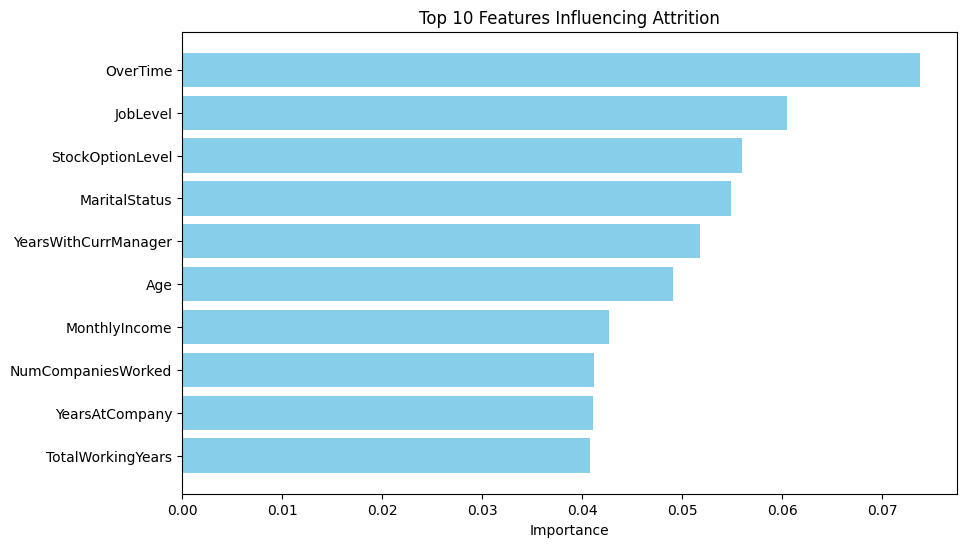

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importances
importances = loaded_model.feature_importances_
feature_names = loaded_scaler.feature_names_in_

# Create a DataFrame for easier visualization
feat_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Plot top 10 important features
plt.figure(figsize=(10,6))
plt.barh(feat_df["Feature"].head(10)[::-1], feat_df["Importance"].head(10)[::-1], color="skyblue")
plt.xlabel("Importance")
plt.title("Top 10 Features Influencing Attrition")
plt.show()


In [21]:
import pandas as pd

def predict_attrition(new_data, scaler, model):
    """
    new_data: list of lists, each inner list is an employee's feature values
    scaler: fitted StandardScaler
    model: trained RandomForestClassifier
    """
    # Convert to DataFrame using scaler's feature names
    df = pd.DataFrame(new_data, columns=scaler.feature_names_in_)
    
    # Scale
    scaled = scaler.transform(df)
    
    # Predict
    pred = model.predict(scaled)
    prob = model.predict_proba(scaled)
    
    # Combine results
    results = []
    for i, p in enumerate(pred):
        results.append({
            "Employee": i+1,
            "Prediction": "Stay" if p == 0 else "Leave",
            "Probability_Stay": prob[i][0],
            "Probability_Leave": prob[i][1]
        })
    return results

# Example usage
results = predict_attrition(new_employees, loaded_scaler, loaded_model)
for r in results:
    print(r)


{'Employee': 1, 'Prediction': 'Stay', 'Probability_Stay': np.float64(0.56), 'Probability_Leave': np.float64(0.44)}
{'Employee': 2, 'Prediction': 'Leave', 'Probability_Stay': np.float64(0.47), 'Probability_Leave': np.float64(0.53)}


In [22]:
import pandas as pd

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Save to CSV
results_df.to_csv("attrition_predictions.csv", index=False)

print("Predictions saved to attrition_predictions.csv")


Predictions saved to attrition_predictions.csv


In [23]:
# Define threshold
leave_threshold = 0.5

# Convert results to DataFrame if not already
results_df = pd.DataFrame(results)

# Filter high-risk employees
high_risk = results_df[results_df["Probability_Leave"] > leave_threshold]

print("High-risk employees (likely to leave):")
print(high_risk)


High-risk employees (likely to leave):
   Employee Prediction  Probability_Stay  Probability_Leave
1         2      Leave              0.47               0.53
